# Figure 6: Robustness Analysis

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
SYNCHRONY_ROBUSTNESS_DIRECTORY = "../../Data/synchrony/all/robustness"
SYNCHRONY_BROADBAND_DIRECTORY = "../../Data/synchrony/all/broadband"
PATIENT_IDS = [143, 159]
multi_ds_patient_ids = [147, 159, 197]

## Panel A: Synchrony using RNS colocated electrodes vs synchrony using all electrodes

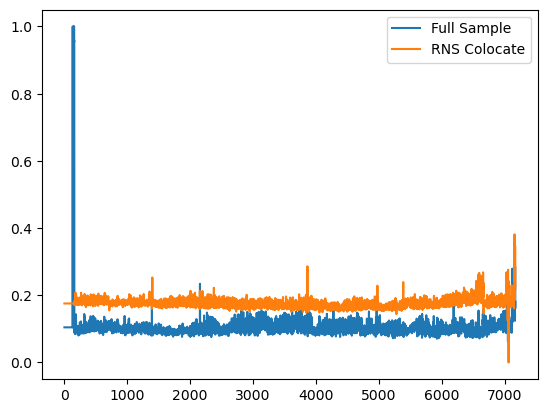

Correlation: 0.04382578706751729


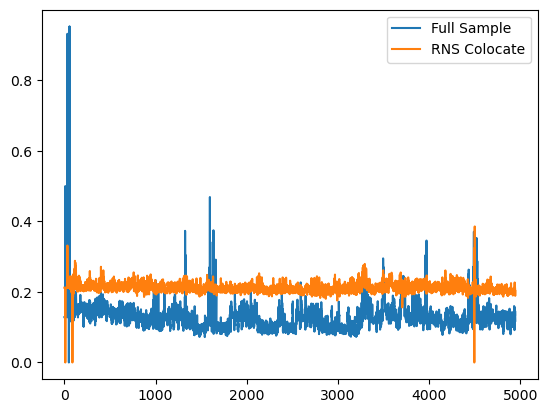

Correlation: 0.2107720253230257


In [3]:
panel_a_correlations = []
for patient_id in PATIENT_IDS:
    if patient_id in multi_ds_patient_ids:
        file = os.path.join(
            SYNCHRONY_ROBUSTNESS_DIRECTORY,
            f"HUP_{patient_id}_D01_random_100.npy",
        )
    else:
        file = os.path.join(
            SYNCHRONY_ROBUSTNESS_DIRECTORY,
            f"HUP_{patient_id}_random_100.npy",
        )
    # load data
    full_sample_synchrony = np.load(file)
    if patient_id in multi_ds_patient_ids:
        file = os.path.join(
            SYNCHRONY_ROBUSTNESS_DIRECTORY,
            f"HUP_{patient_id}_D01_rns.npy",
        )
    else:
        file = os.path.join(
            SYNCHRONY_ROBUSTNESS_DIRECTORY,
            f"HUP_{patient_id}_rns.npy",
        )

    # load data
    rns_synchrony = np.load(file)
    # Find the index of the last non-nan value
    last_non_nan = np.where(~np.isnan(full_sample_synchrony))[0][-1]
    # Trim the array to only include non-nan values
    full_sample_synchrony = full_sample_synchrony[: last_non_nan + 1]

    # Find the index of the last non-nan value
    last_non_nan = np.where(~np.isnan(rns_synchrony))[0][-1]
    # Trim the array to only include non-nan values
    rns_synchrony = rns_synchrony[: last_non_nan + 1]
    # Interpolate the nan values by taking the mean of the previous and next value
    full_sample_synchrony = np.nan_to_num(
        full_sample_synchrony, nan=np.nanmean(full_sample_synchrony)
    )
    # Interpolate the nan values by taking the mean of the previous and next value
    rns_synchrony = np.nan_to_num(rns_synchrony, nan=np.nanmean(rns_synchrony))
    assert full_sample_synchrony.shape == rns_synchrony.shape

    # plot both full_sample and rns synchrony
    plt.plot(full_sample_synchrony, label="Full Sample")
    plt.plot(rns_synchrony, label="RNS Colocate")
    plt.legend()
    plt.show()

    # Calculate the Pearson correlation coefficient
    corr = np.corrcoef(full_sample_synchrony, rns_synchrony)[0, 1]
    panel_a_correlations.append(corr)
    print(f"Correlation: {corr}")

In [4]:
panel_a_correlations

[0.04382578706751729, 0.2107720253230257]

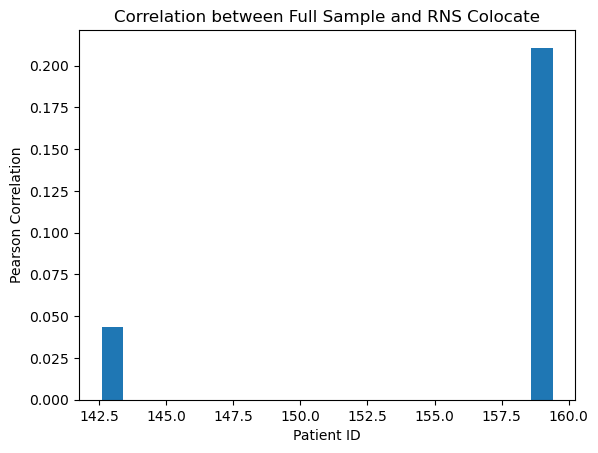

In [5]:
plt.bar(PATIENT_IDS, panel_a_correlations)
plt.xlabel("Patient ID")
plt.ylabel("Pearson Correlation")
plt.title("Correlation between Full Sample and RNS Colocate")
plt.show()

## Panel B: Correlation with full-sample synchrony as number of electrodes sampled increases

In [6]:
PATIENT_IDS = [143, 147, 159, 182, 197, 199]
multi_ds_patient_ids = [147, 159, 197]

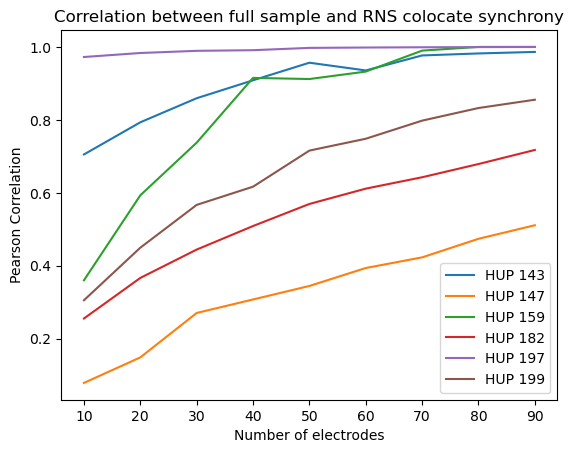

In [7]:
for patient_id in PATIENT_IDS:
    correlations = []
    electrode_counts = list(range(10, 91, 10))
    if patient_id in multi_ds_patient_ids:
        file = os.path.join(
            SYNCHRONY_ROBUSTNESS_DIRECTORY,
            f"HUP_{patient_id}_D01_random_100.npy",
        )
    else:
        file = os.path.join(
            SYNCHRONY_ROBUSTNESS_DIRECTORY,
            f"HUP_{patient_id}_random_100.npy",
        )
    # load data
    full_sample_synchrony = np.load(file)
    # Find the index of the last non-nan value
    last_non_nan = np.where(~np.isnan(full_sample_synchrony))[0][-1]
    # Trim the array to only include non-nan values
    full_sample_synchrony = full_sample_synchrony[: last_non_nan + 1]
    # Interpolate the nan values by taking the mean of the previous and next value
    full_sample_synchrony = np.nan_to_num(
        full_sample_synchrony, nan=np.nanmean(full_sample_synchrony)
    )

    for n in electrode_counts:
        if patient_id in multi_ds_patient_ids:
            file = os.path.join(
                SYNCHRONY_ROBUSTNESS_DIRECTORY,
                f"HUP_{patient_id}_D01_random_{n}.npy",
            )
        else:
            file = os.path.join(
                SYNCHRONY_ROBUSTNESS_DIRECTORY,
                f"HUP_{patient_id}_random_{n}.npy",
            )
        # load data
        rns_synchrony = np.load(file)
        # Find the index of the last non-nan value
        last_non_nan = np.where(~np.isnan(rns_synchrony))[0][-1]
        # Trim the array to only include non-nan values
        rns_synchrony = rns_synchrony[: last_non_nan + 1]
        # Interpolate the nan values by taking the mean of the previous and next value
        rns_synchrony = np.nan_to_num(rns_synchrony, nan=np.nanmean(rns_synchrony))
        assert full_sample_synchrony.shape == rns_synchrony.shape
        # Calculate the Pearson correlation coefficient
        corr = np.corrcoef(full_sample_synchrony, rns_synchrony)[0, 1]
        correlations.append(corr)
    plt.plot(electrode_counts, correlations, label=f"HUP {patient_id}")
plt.legend()
plt.xlabel("Number of electrodes")
plt.ylabel("Pearson Correlation")
plt.title("Correlation between full sample and RNS colocate synchrony")
plt.show()

## Panel C: Median synchrony vs number of electrodes sampled

For each patient we are conducting robust analysis on, randomly select 10, 20, 30, ..., 100 electrodes. Calculate the synchrony time series.

In [8]:
electrode_counts = list(range(10, 101, 10))
electrode_counts

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

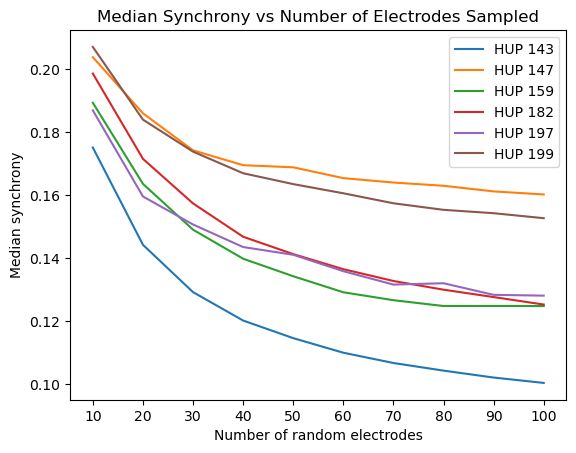

In [9]:
for patient_id in PATIENT_IDS:
    median_synchrony_list = []
    for electrode_count in electrode_counts:
        # Construct file paths
        if patient_id in multi_ds_patient_ids:
            file = os.path.join(
                SYNCHRONY_ROBUSTNESS_DIRECTORY,
                f"HUP_{patient_id}_D01_random_{electrode_count}.npy",
            )
        else:
            file = os.path.join(
                SYNCHRONY_ROBUSTNESS_DIRECTORY,
                f"HUP_{patient_id}_random_{electrode_count}.npy",
            )
        # load data
        random_electrodes_synchrony = np.load(file)
        median_synchrony = np.nanmedian(random_electrodes_synchrony)
        median_synchrony_list.append(median_synchrony)

    # Plot median synchrony with x axis as electrode count
    plt.plot(electrode_counts, median_synchrony_list, label=f"HUP {patient_id}")
    # Plot all x axis values
    plt.xticks(electrode_counts)
    plt.xlabel("Number of random electrodes")
    plt.ylabel("Median synchrony")
    plt.title(f"Median Synchrony vs Number of Electrodes Sampled")
    plt.legend()

The above plot shows the median synchrony across the time series decreases as we increase the number of electrodes sampled. This makes sense: the more electrodes we include, the more variations there are and hence leading to smaller synchrony.